In [2]:
import numpy as np
import os
import sys
import subprocess
import matplotlib.pyplot as plt

In [3]:
k1 = np.array([32,48,64,60])
k3 = {k1[0]:[16,32],k1[1]:[16,32,48],k1[2]:[16,32,48],k1[3]:[60]}


In [4]:
kk1=0

aceptados = []
denegados = []

aceptados_k = []
denegados_k = []


for kk1 in range(len(k1)):
    for kk3 in range(len(k3[ k1[kk1] ])):

        name = str(k1[kk1])+'x'+str(k1[kk1])+'x'+str(k3[ k1[kk1] ][kk3])+'.log'
        print(name)
        #result = subprocess.run(['bash','./log_Hqpgw_new/read.sh', './log_Hqpgw_new/'+name, 'E(1)'],capture_output=True,text=True)
        check = subprocess.run(['bash','./log_Hqpgw_new/read.sh', './log_Hqpgw_new/'+name, 'WARNING', '0'],capture_output=True,text=True)

        if len(check.stdout.strip()) >=1:
            result = subprocess.run(['bash','./log_Hqpgw_new/read.sh', './log_Hqpgw_new/'+name, 'E(1)', '1'],capture_output=True,text=True)
            denegados.append(float(result.stdout.strip()))
            denegados_k.append([k1[kk1],k3[ k1[kk1] ][kk3]])
        else:
            result = subprocess.run(['bash','./log_Hqpgw_new/read.sh', './log_Hqpgw_new/'+name, 'E(1)', '1'],capture_output=True,text=True)
            aceptados.append(float(result.stdout.strip()))
            aceptados_k.append([k1[kk1],k3[ k1[kk1] ][kk3]])


aceptados_k = np.array(aceptados_k)
denegados_k = np.array(denegados_k)

aceptados_k[:,0] = np.float64(aceptados_k[:,0]**2)
denegados_k[:,0] = np.float64(denegados_k[:,0]**2)


puntos_denegados = np.prod(denegados_k, axis=1, keepdims=True)
puntos_aceptados = np.prod(aceptados_k, axis=1, keepdims=True)

aceptados_k[:,0] = np.int64(aceptados_k[:,0]**0.5)
denegados_k[:,0] = np.int64(denegados_k[:,0]**0.5)



32x32x16.log
32x32x32.log
48x48x16.log
48x48x32.log
48x48x48.log
64x64x16.log
64x64x32.log
64x64x48.log
60x60x60.log


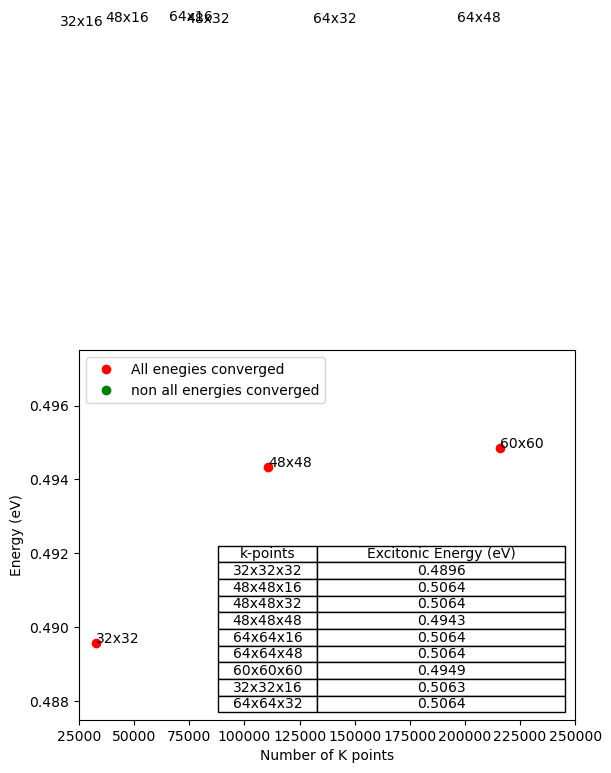

In [33]:
plt.plot(puntos_aceptados,aceptados,'o',color="red",label="All enegies converged")
plt.plot(puntos_denegados,denegados,'o',color="green",label="non all energies converged")

for i in range(len(puntos_aceptados)):
    plt.text(puntos_aceptados[i],aceptados[i], "%ix%i"%(aceptados_k[i,0],aceptados_k[i,1]), horizontalalignment='left', size='medium', color='black')

for i in range(len(puntos_denegados)):
    plt.text(puntos_denegados[i],denegados[i], "%ix%i"%(denegados_k[i,0],denegados_k[i,1]), horizontalalignment='left', size='medium', color='black')

plt.xlabel("Number of K points")
plt.ylabel("Energy (eV)")

#plt.ylim(0.5060,0.5070)


plt.ylim(0.4875,0.4975)
plt.xlim(25000,250000)


# Create a table with local minima
table_data = [['k-points', 'Excitonic Energy (eV)']]
for i in range(len(puntos_aceptados)):
    table_data.append(["%ix%ix%i"%(aceptados_k[i,0],aceptados_k[i,0],aceptados_k[i,1]), "%.4f"%(aceptados[i])])

for i in range(len(puntos_denegados)):
    table_data.append(["%ix%ix%i"%(denegados_k[i,0],denegados_k[i,0],denegados_k[i,1]), "%.4f"%(denegados[i])])

    
plt.table(cellText=table_data,  loc='lower right', colWidths=[0.2, 0.5], cellLoc='center', colLabels=table_data.pop(0))

#plt.subplots_adjust(left=0.2, bottom=0.2)

plt.legend(loc="upper left")


plt.savefig("figura_1.png")